In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory("/Users/archith25/Desktop/My_Workspace/Datasets/Avengers/Avengers/train", 
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode = "categorical")

Found 2663 images belonging to 6 classes.


In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("/Users/archith25/Desktop/My_Workspace/Datasets/Avengers/Avengers/test", 
                                            target_size = (64, 64), 
                                            batch_size = 32, 
                                            class_mode = "categorical")

Found 338 images belonging to 6 classes.


In [17]:
cnn = tf.keras.models.Sequential()

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3]))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [21]:
cnn.add(tf.keras.layers.Flatten())

In [22]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [23]:
cnn.add(tf.keras.layers.Dense(units = 6, activation = 'softmax'))

In [24]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
trained_model = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 388ms/step - accuracy: 0.2420 - loss: 1.7762 - val_accuracy: 0.3817 - val_loss: 1.4820
Epoch 2/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 390ms/step - accuracy: 0.4566 - loss: 1.3948 - val_accuracy: 0.4527 - val_loss: 1.3432
Epoch 3/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 29s 345ms/step - accuracy: 0.5169 - loss: 1.2780 - val_accuracy: 0.4911 - val_loss: 1.2578
Epoch 4/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 28s 337ms/step - accuracy: 0.5384 - loss: 1.1767 - val_accuracy: 0.5325 - val_loss: 1.1804
Epoch 5/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 29s 345ms/step - accuracy: 0.5814 - loss: 1.1218 - val_accuracy: 0.5533 - val_loss: 1.1495
Epoch 6/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 29s 350ms/step - accuracy: 0.6292 - loss: 1.0223 - val_accuracy: 0.5414 - val_loss: 1.1500
Epoch 7/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 30s 355ms/step - accuracy: 0.6248 - loss: 1.0107 - val_accuracy: 0.5621 - val_loss: 1.1567
Epoch 8/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 30s 357ms/step - accuracy: 0.6755 - loss: 0.9072 - val_accu

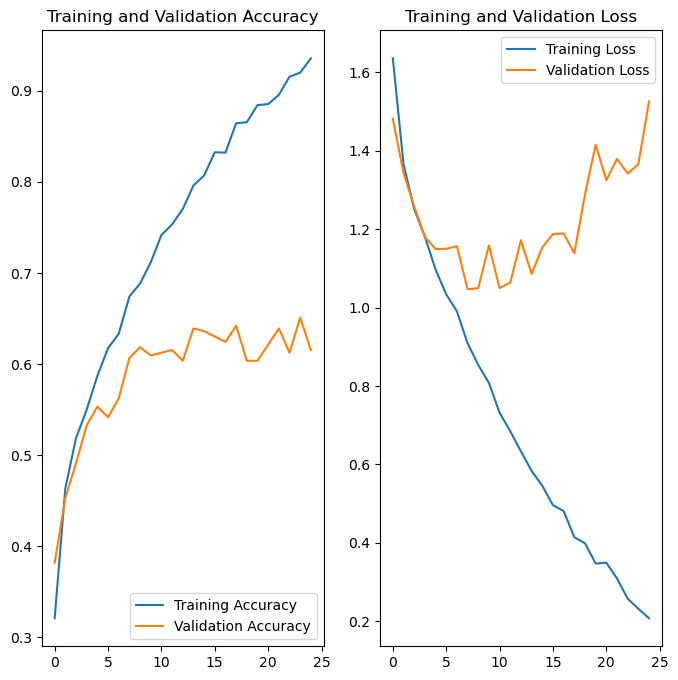

In [26]:
acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']

loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Selected Image:  /Users/archith25/Desktop/My_Workspace/Datasets/Avengers/Avengers/val/Ironman/ironman397.jpg


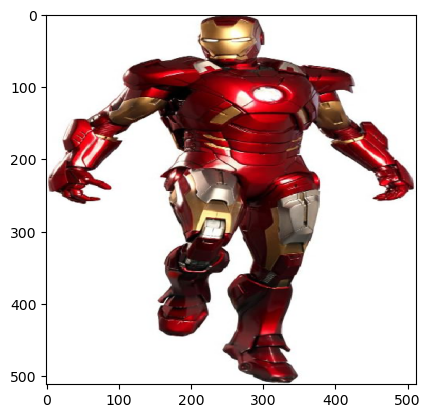

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction: Ironman


In [39]:
import numpy as np
from tensorflow.keras.preprocessing import image
import glob, random
from PIL import Image

file_path_type = ["/Users/archith25/Desktop/My_Workspace/Datasets/Avengers/Avengers/val/*/*.jpg"]
images = glob.glob(random.choice(file_path_type))
random_image = random.choice(images)

print("Selected Image: ", random_image)
plt.imshow(image.load_img(random_image, target_size = (512, 512)))
plt.show()
test_image = image.load_img(random_image, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)
class_labels = training_set.class_indices

predicted_class_index = np.argmax(result)
predicted_class_name = list(class_labels.keys())[predicted_class_index]

confidence_score = result[0, predicted_class_index]

print("Prediction:", predicted_class_name)